# Final Project -- Cats Adoption in Austin

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <u> 1. Data Set Description <u>

<ul>
<li> <b> df </b>is a data set for shelter cat outcomes of Austin Animal Center from 10/1/2013 to the present</li>
</ul>

Important columns in <b> df </b> are:
<ol>
<li> <b> Breed </b>: Breed of cats (eg: domestic shorthair, domestic mediumhair, domestic longhair, etc.). </li>
<li> <b> Color </b>: Color of cats (eg: orange, black, white, etc.). </li>
<li> <b> Spay/Neuter </b>: If sterilization was done or not. </li>
<li> <b> Outcome_age_(days) </b>: Approximate age of cats upon the outcome days. </li>
<li> <b> Cat/Kitten (outcome) </b>: Whether a cat was of adult or kitten age upon outcome. Kittens are defined as cats of approximately five months old or younger. </li>
<li> <b> Name </b>: Name of cats. Give 'name' a nan if the cat does not have a name. </li>
<li> <b> Outcome_type </b>: The type of outcomes of shelter cats (eg:Transfer, Adoption, Return to Owner, Died, Euthanasia,Missing, Disposal, Rto-Adopt). </li>
<li> <b> Sex_upon_outcome </b>: Intact Male, Intact Female, Spayed Female, Neutered Male </li>
<li> <b> Sex </b>: Male or female. </li>
<li> <b> Cfa_breed </b>: Whether the cat is a rare species. False means regular species and True means rare species. </li>
<li> <b> Coat </b>: Type of coat (eg: apricot, lynx, chocolate, silver, etc.)</li>

# Understand the Data

In [10]:
df = pd.read_csv('aac_shelter_cat_outcome_eng.csv')

In [11]:
len(df)

29421

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 37 columns):
age_upon_outcome        29421 non-null object
animal_id               29421 non-null object
animal_type             29421 non-null object
breed                   29421 non-null object
color                   25795 non-null object
date_of_birth           29421 non-null object
datetime                29421 non-null object
monthyear               29421 non-null object
name                    16647 non-null object
outcome_subtype         18641 non-null object
outcome_type            29418 non-null object
sex_upon_outcome        29421 non-null object
count                   29421 non-null int64
sex                     29421 non-null object
Spay/Neuter             29421 non-null object
Periods                 29421 non-null int64
Period Range            29421 non-null int64
outcome_age_(days)      29421 non-null int64
outcome_age_(years)     29421 non-null float64
Cat/Kitten (outcome)

In [7]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


In [8]:
print(df.iloc[0])

age_upon_outcome                    2 weeks
animal_id                           A684346
animal_type                             Cat
breed                    domestic shorthair
color                                orange
date_of_birth           2014-07-07 00:00:00
datetime                2014-07-22 16:04:00
monthyear               2014-07-22T16:04:00
name                                    NaN
outcome_subtype                     Partner
outcome_type                       Transfer
sex_upon_outcome                Intact Male
count                                     1
sex                                    Male
Spay/Neuter                              No
Periods                                   2
Period Range                              7
outcome_age_(days)                       14
outcome_age_(years)               0.0383562
Cat/Kitten (outcome)                 Kitten
sex_age_outcome          Intact Male Kitten
age_group                     (-0.022, 2.2]
dob_year                        

In [9]:
#Check cat id duplicates
len(set(df.animal_id))
#Since every adoption is an individual action and our study will focus on that action, we decided not to drop duplicates here.

28209

In [10]:
# Check the categorical variables
df.breed.unique()
df.color.unique()
df['Spay/Neuter'].unique()
df['outcome_age_(days)'].unique()
df['Cat/Kitten (outcome)'].unique()
df.name.unique()
df.outcome_type.unique()
df.sex_upon_outcome.unique()
df.sex.unique()
df.sex_age_outcome.unique()
df.age_group.unique()
df.cfa_breed.unique()
df.coat.unique()

array(['domestic shorthair', 'domestic mediumhair', 'siamese',
       'russian blue', 'domestic longhair', 'manx', 'ragdoll',
       'snowshoe/domestic shorthair', 'snowshoe', 'angora', 'himalayan',
       'domestic longhair/persian', 'japanese bobtail',
       'domestic longhair/rex', 'siamese/domestic shorthair',
       'domestic mediumhair/siamese', 'maine coon', 'devon rex',
       'balinese', 'american shorthair', 'british shorthair',
       'angora/persian', 'munchkin shorthair',
       'domestic shorthair/siamese', 'manx/domestic longhair', 'persian',
       'cymric', 'tonkinese', 'siamese/angora', 'burmese', 'sphynx',
       'domestic shorthair/domestic mediumhair', 'bengal',
       'domestic longhair/russian blue', 'bombay', 'exotic shorthair',
       'domestic shorthair/british shorthair', 'abyssinian',
       'manx/domestic shorthair', 'norwegian forest cat',
       'snowshoe/ragdoll', 'manx/siamese', 'turkish van', 'cornish rex',
       'birman', 'american curl shorthair', 

array(['orange', 'blue /white', 'white/black', 'black/white', 'brown',
       'brown /white', 'black', 'seal', nan, 'blue', 'cream /white',
       'chocolate', 'orange /white', 'blue/white', 'silver', 'flame',
       'white/orange', 'cream', 'lynx', 'orange/white', '/white', 'white',
       'white/blue', 'white/seal', '/', 'seal /white', 'lilac',
       'white/brown', 'buff', 'blue /black', '/blue cream', 'blue cream',
       'black /white', 'white/lynx', 'silver lynx', 'gray', 'gray /white',
       'chocolate/black', 'gray/white', 'yellow', '/blue', 'white/red',
       '/orange', 'apricot', 'lynx /white', 'brown /orange', 'blue/cream',
       'chocolate /white', 'white/cream', 'chocolate/white',
       'silver /white', 'lynx /brown', 'white/gray', 'buff/white',
       'blue cream/buff', 'black/chocolate', 'lilac /white', '/black',
       'brown tiger', 'brown/white', 'brown /black', 'silver /black',
       '/brown', 'blue/gray', 'blue cream/blue', 'cream/seal',
       'lynx /gray', 'b

array(['No', 'Yes'], dtype=object)

array([  14,   30,   90,  365,   21,   60,  240,  150, 1095, 1460,  730,
       2555,   28, 2190,  120, 2920, 3650, 5475,  300,  330,  180, 5840,
        270,    3,    6, 4015,   35,    7, 1825,    2,  210,    5, 3285,
       5110, 4745,    1,    4, 4380,    0, 6205, 7300, 6570, 6935, 8030])

array(['Kitten', 'Cat'], dtype=object)

array([nan, 'Lucy', '*Frida', ..., 'Wonder Woman', 'Allee Chat', 'Mac'], dtype=object)

array(['Transfer', 'Adoption', 'Return to Owner', 'Died', 'Euthanasia',
       'Missing', 'Disposal', 'Rto-Adopt', nan], dtype=object)

array(['Intact Male', 'Intact Female', 'Spayed Female', 'Unknown',
       'Neutered Male'], dtype=object)

array(['Male', 'Female'], dtype=object)

array(['Intact Male Kitten', 'Intact Female Kitten',
       'Spayed Female Kitten', 'Spayed Female Cat', 'Unknown Cat',
       'Neutered Male Kitten', 'Neutered Male Cat', 'Unknown Kitten',
       'Intact Female Cat', 'Intact Male Cat'], dtype=object)

array(['(-0.022, 2.2]', '(2.2, 4.4]', '(6.6, 8.8]', '(4.4, 6.6]',
       '(8.8, 11.0]', '(13.2, 15.4]', '(15.4, 17.6]', '(11.0, 13.2]',
       '(19.8, 22.0]', '(17.6, 19.8]'], dtype=object)

array([False,  True], dtype=bool)

array(['orange', 'blue ', 'white', 'black', 'brown', 'brown ', 'seal',
       'torbie', 'blue', 'cream ', 'calico', 'chocolate', 'orange ',
       'silver', 'flame', 'tortie', 'cream', 'lynx', 'seal ', 'lilac',
       'buff', 'blue cream', 'black ', 'silver lynx', 'gray', 'gray ',
       'yellow', 'apricot', 'lynx ', 'chocolate ', 'silver ', 'lilac ',
       'brown tiger', 'black tiger', 'tan', 'orange tiger', 'agouti',
       'flame ', 'silver lynx ', 'tricolor', 'sable', 'pink',
       'brown merle', 'fawn'], dtype=object)

# <u> 2.  Exploratory Data Analysis <u>

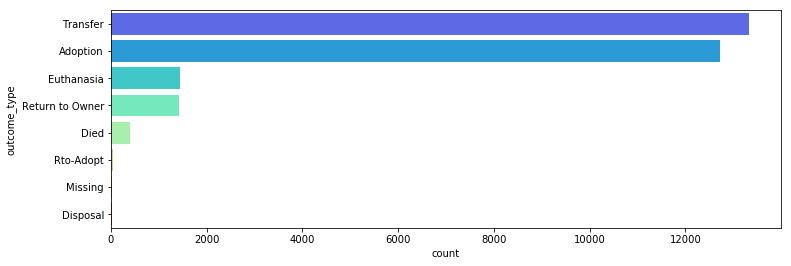

In [11]:
# First we loot at the possible outcomes
plt.figure(figsize=(12,4))
sns.countplot(y=df['outcome_type'], palette='rainbow', order=df['outcome_type'].value_counts().index)

Based on the graph, even though most of the cats have been transfered, there is still a large majority of cats been adopted (Yay!). Cases like euthanasia, return to owner, death, rto-adopt, missing and disposal are very rare compared to transfer and adoption. Given the fact that adoption is the most desirable outcome and it has much more cases and features to work with, we consider correctly predicting adoption outcome to be a meaningful task.

In [12]:
# Around 43% of cats have been adopted:) It's a quite balanced dataset with Adoption vs Not Adaoption being roughly 43% : 57%.
float(len(df[df.outcome_type == 'Adoption'])) / len(df)

0.4327521158356276

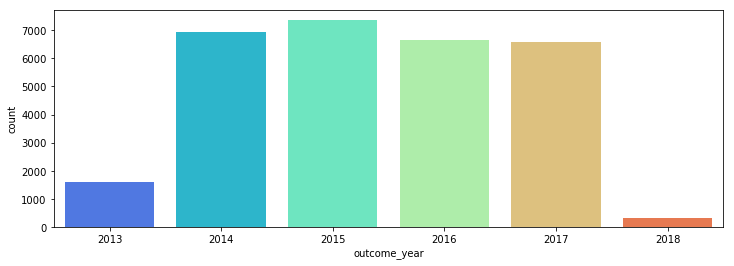

In [13]:
# Check the adoption count in each year
plt.figure(figsize=(12,4))
sns.countplot(x=df['outcome_year'], 
              palette='rainbow')

We have incomplete data for 2013  and 2018. However, we will not use year in our model.

# <u> 3. Data Cleaning

In [12]:
# Check number of NA
df.isnull().sum()

age_upon_outcome            0
animal_id                   0
animal_type                 0
breed                       0
color                    3626
date_of_birth               0
datetime                    0
monthyear                   0
name                    12774
outcome_subtype         10780
outcome_type                3
sex_upon_outcome            0
count                       0
sex                         0
Spay/Neuter                 0
Periods                     0
Period Range                0
outcome_age_(days)          0
outcome_age_(years)         0
Cat/Kitten (outcome)        0
sex_age_outcome             0
age_group                   0
dob_year                    0
dob_month                   0
dob_monthyear               0
outcome_month               0
outcome_year                0
outcome_weekday             0
outcome_hour                0
breed1                      0
breed2                  29369
cfa_breed                   0
domestic_breed              0
coat_patte

In [13]:
# Create dummy variable name: 1 means the cat has name, 0 means no name
df['name'] = 1 - 1 * df.name.isnull()

In [14]:
# Dropping the duplicated columns and unnecessary columns

# We keep "age_upon_outcome_days" for analysis of age
df.drop('age_upon_outcome', axis=1, inplace=True)
df.drop('date_of_birth', axis=1, inplace=True)
df.drop('outcome_age_(years)', axis=1, inplace=True)
df.drop('Periods', axis=1, inplace=True)
df.drop('Period Range', axis=1, inplace=True)
df.drop('age_group', axis=1, inplace=True)
df.drop('dob_year', axis=1, inplace=True)
df.drop('dob_month', axis=1, inplace=True) 
df.drop('dob_monthyear', axis=1, inplace=True)

# Adoption date is irrelevant to our analysis
df.drop('datetime', axis=1, inplace=True)
df.drop('monthyear', axis=1, inplace=True)

# Drop duplicated columns or columns with too detailed information or null column
df.drop('outcome_subtype', axis=1, inplace=True)
df.drop('breed1', axis=1, inplace=True)
df.drop('breed2', axis=1, inplace=True)
df.drop('color1', axis=1, inplace=True)
df.drop('color2', axis=1, inplace=True)

# We only use the cat dataset for analysis because it contains more information such as coat color, coat pattern, etc.
df.drop('animal_type', axis=1, inplace=True)

# All cat count 1 in the dataset so we drop this column
df.drop('count', axis=1, inplace=True)

In [15]:
# Rename the column
df.rename(columns={'outcome_age_(days)':'outcome_age_days'}, inplace=True)

In [16]:
# Replace NA with "unknown"
df['coat_pattern'] = df.coat_pattern.replace({nan: 'unknown'})


In [17]:
# Remove NA
df = df.dropna(axis=0, how='any')

In [18]:
# Create dummy variables 

df['adoption'] = (df.outcome_type == 'Adoption') * 1
df['male'] = (df.sex == 'Male') * 1
df['sterilization'] = (df['Spay/Neuter'] == 'Yes') * 1
df['cfa_breed'] = df['cfa_breed'] * 1
df['domestic_breed'] = df['domestic_breed'] * 1.0

# Create a weekend dummy:
df['weekend'] = df['outcome_weekday'].apply(lambda x: 1 if 'Saturday' in x or'Sunday' in x else 0)
df.drop('outcome_weekday', axis=1, inplace=True)

# Create kitten dummy:
df['Kitten'] = (df['Cat/Kitten (outcome)'] == 'Kitten') * 1
df.drop('Cat/Kitten (outcome)', axis=1, inplace=True)

In [19]:
# Create a new column to represent the cat's age range
def catage(val):
    if val <= 90:
        return 'baby kitten'
    elif val <= 150:
        return 'kitten'
    elif val <=365:
        return '0.5~1 year old'
    elif val <=1095:
        return '1~3 years old'
    elif val <=2555:
        return '3~7 years old'
    else:
        return '>7 years old'

df['age_range'] = df['outcome_age_days'].apply(catage)

In [20]:
# Check types of coat color as well as breed, and find the most common five respectively.
len(df.coat.unique())
df.coat.value_counts().head(5)

len(df.breed.unique())
df.breed.value_counts().head(5)

44

black     7018
brown     4482
blue      3052
brown     2415
orange    2296
Name: coat, dtype: int64

62

domestic shorthair     20719
domestic mediumhair     2140
domestic longhair       1116
siamese                  968
american shorthair       199
Name: breed, dtype: int64

In [21]:
# Remove space in coat and create a dummy variable called "common_coat"
df.coat = df.coat.map(str.strip)
df['common_coat'] = np.in1d(df.coat, ['black', 'brown', 'blue', 'orange', 'white']) * 1
df['major_breed'] = np.in1d(df.breed, ['domestic shorthair', 'domestic mediumhair', 'domestic longhair']) * 1

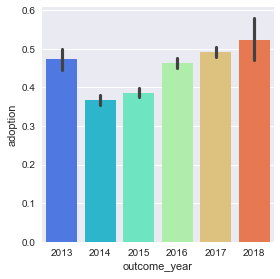

In [22]:
# Check the adoption rate in each year
sns.factorplot(x='outcome_year',y='adoption',data=df, palette='rainbow',kind='bar')

In [23]:
#The daraframe after cleaning is as below:
df.head()

,animal_id,breed,color,name,outcome_type,sex_upon_outcome,sex,Spay/Neuter,outcome_age_days,sex_age_outcome,...,coat_pattern,coat,adoption,male,sterilization,weekend,Kitten,age_range,common_coat,major_breed
0,A684346,domestic shorthair,orange,0,Transfer,Intact Male,Male,No,14,Intact Male Kitten,...,tabby,orange,0,1,0,0,1,baby kitten,1,1
1,A685067,domestic shorthair,blue /white,1,Adoption,Intact Female,Female,No,30,Intact Female Kitten,...,tabby,blue,1,0,0,0,1,baby kitten,1,1
2,A678580,domestic shorthair,white/black,1,Adoption,Spayed Female,Female,Yes,90,Spayed Female Kitten,...,unknown,white,1,0,1,1,1,baby kitten,1,1
3,A675405,domestic mediumhair,black/white,1,Return to Owner,Spayed Female,Female,Yes,365,Spayed Female Cat,...,unknown,black,0,0,1,0,0,0.5~1 year old,1,1
4,A670420,domestic shorthair,black/white,0,Transfer,Intact Male,Male,No,21,Intact Male Kitten,...,unknown,black,0,1,0,0,1,baby kitten,1,1


# Q: What affect the chance of adoption?

# <u> 4. Machine Learning </u>

# (1) Classification

### Decision Tree

In [26]:
# Create
df_dt = df.copy()

In [27]:
# Around 43% of cats have been adopted:) Still a quite balanced dataset with Adoption vs Not Adaoption being roughly 43% : 57%.
df_dt.adoption.mean()

0.4293579404466501

In [28]:
# Drop columns that contain duplicated or unnecessary information
df_dt.drop('animal_id', axis=1, inplace=True)
df_dt.drop('color', axis=1, inplace=True)
df_dt.drop('outcome_type', axis=1, inplace=True)
df_dt.drop('sex_upon_outcome', axis=1, inplace=True)
df_dt.drop('Spay/Neuter', axis=1, inplace=True)
df_dt.drop('outcome_age_days', axis=1, inplace=True)
df_dt.drop('outcome_month', axis=1, inplace=True)
df_dt.drop('outcome_year', axis=1, inplace=True)
df_dt.drop('outcome_hour', axis=1, inplace=True)
df_dt.drop('sex', axis=1, inplace=True)
df_dt.drop('sex_age_outcome', axis=1, inplace=True)
df_dt.drop('Kitten', axis=1, inplace=True)

In [29]:
df_dt.head()

,breed,name,cfa_breed,domestic_breed,coat_pattern,coat,adoption,male,sterilization,weekend,age_range,common_coat,major_breed
0,domestic shorthair,0,0,1.0,tabby,orange,0,1,0,0,baby kitten,1,1
1,domestic shorthair,1,0,1.0,tabby,blue,1,0,0,0,baby kitten,1,1
2,domestic shorthair,1,0,1.0,unknown,white,1,0,1,1,baby kitten,1,1
3,domestic mediumhair,1,0,1.0,unknown,black,0,0,1,0,0.5~1 year old,1,1
4,domestic shorthair,0,0,1.0,unknown,black,0,1,0,0,baby kitten,1,1


In [30]:
# Get dummies for breed, coat and age_range
df_dt = pd.get_dummies(df_dt, columns=['coat','age_range', 'breed', 'coat_pattern'])

In [31]:
# Create X and Y for Decision Tree Classifier
X = df_dt.drop('adoption',axis=1)
Y = df_dt.adoption

In [32]:
dt = tree.DecisionTreeClassifier(max_depth=4)

dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

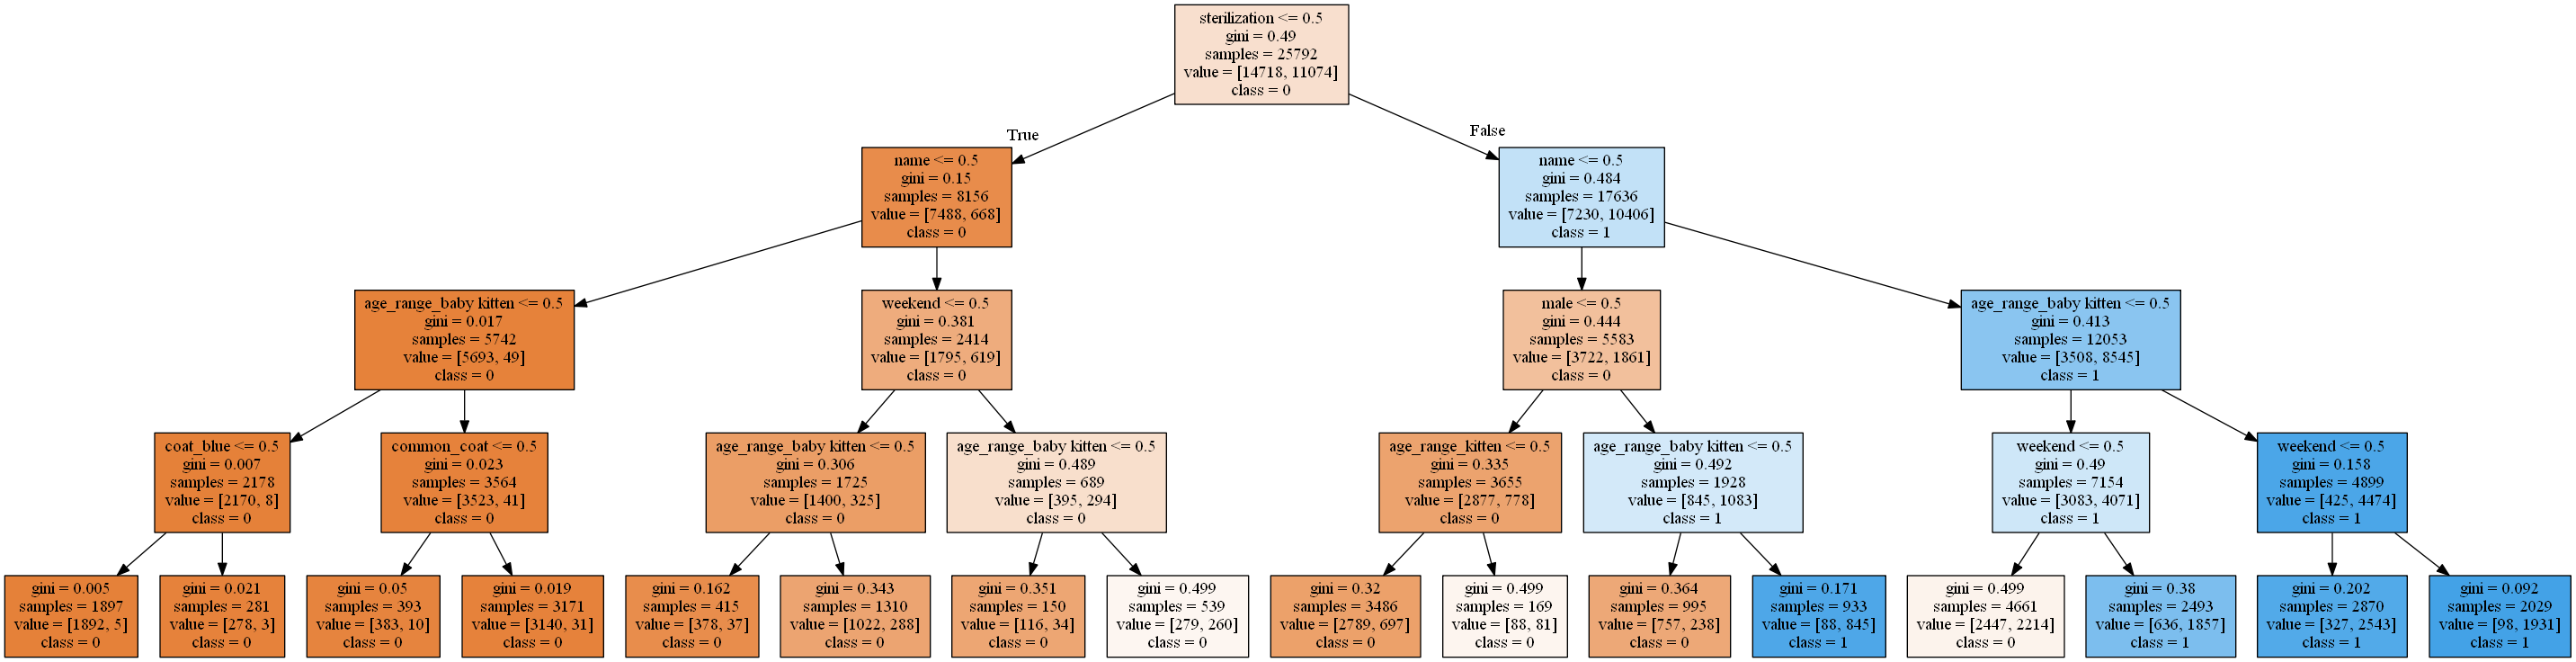

In [33]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Explaination: 

1. If the cat is not spayed or neuter, and does not have a name, and is not in age range 1~3 years old, it has a very low probability to be adopted. 
2. If the cat is spayed or neuter, and it does not have a name, then it would have a higher adoption rate if it is a male cat and a baby kitten.
3. If the cat is spayed or neuter, and it has a name, then it would have a higher adoption rate if it is a baby kitten no matter whether the adoption happened in weekday or weekend.

### Random Forest

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [36]:
# Check the length
len(X)
len(X_train)
len(X_test)
len(X_train) / float (len(X))

25792

18054

7738

0.6999844913151365

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
cl = RandomForestClassifier(random_state = 0)

In [39]:
cl.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
cl.predict(X_test)

array([0, 1, 1, ..., 0, 1, 0])

In [41]:
(cl.predict(X_test) == Y_test).mean()

0.80705608684414576

In [42]:
y_pred = cl.predict(X_test)
y_pred[:20]

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [43]:
cl.predict_proba(X_test)[:, 1]

array([ 0.44905789,  0.625     ,  0.5539337 , ...,  0.        ,
        0.88910084,  0.        ])

In [44]:
y_pred_proba = cl.predict_proba(X_test)[:, 1]
y_pred_proba[:20]

array([ 0.44905789,  0.625     ,  0.5539337 ,  0.        ,  0.05      ,
        0.        ,  0.81847401,  0.93675137,  0.28779221,  0.34678491,
        0.33333333,  0.38333333,  0.12437454,  0.00947828,  0.35690561,
        0.97568459,  0.51758771,  0.28074547,  0.96390891,  0.57916667])

#### Collect Scores

In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3695,  766],
       [ 727, 2550]], dtype=int64)

In [46]:
# Accuracy
(y_pred == Y_test).mean()

0.80705608684414576

In [47]:
# Precision
import sklearn.metrics as met
met.precision_score(Y_test,y_pred)

0.76899879372738233

In [48]:
Y_test.mean()

0.42349444300852934

In [49]:
# Recall
met.recall_score(Y_test,y_pred)

0.778150747635032

In [50]:
# AUC score
met.roc_auc_score(Y_test,y_pred_proba)

0.88871952814946498

#### Cross-validation

In [51]:
from sklearn.model_selection import KFold

In [52]:
nfolds = 10

In [53]:
kf = KFold(n_splits = nfolds, random_state = 0, shuffle = True)

In [54]:
sk.model_selection.cross_val_score(cl, X, Y, cv=kf, n_jobs = -1, scoring = 'roc_auc').mean()

0.89464271896508252

In [55]:
avgCV_AUC = sk.model_selection.cross_val_score(cl, X, Y, cv=kf, n_jobs = -1, scoring = 'roc_auc').mean()

### Which one is better?

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [57]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.878808922493
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.893861314744
GaussianNB(priors=None) 0.816604347203
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
       

# (2) Clustering

In [24]:
df_clus = df.copy()

In [25]:
# Drop columns that contain duplicated or unnecessary information
df_clus.drop('animal_id', axis=1, inplace=True)
df_clus.drop('color', axis=1, inplace=True)
df_clus.drop('outcome_type', axis=1, inplace=True)
df_clus.drop('sex_upon_outcome', axis=1, inplace=True)
df_clus.drop('Spay/Neuter', axis=1, inplace=True)
df_clus.drop('outcome_month', axis=1, inplace=True)
df_clus.drop('outcome_year', axis=1, inplace=True)
df_clus.drop('outcome_hour', axis=1, inplace=True)
df_clus.drop('breed', axis = 1, inplace = True)
df_clus.drop('sex', axis=1, inplace=True)
df_clus.drop('sex_age_outcome', axis=1, inplace=True)
df_clus.drop('coat', axis=1, inplace=True)
df_clus.drop('age_range', axis=1, inplace=True)
df_clus.drop('coat_pattern', axis=1, inplace=True)

In [26]:
from sklearn.cluster import KMeans

In [27]:
df_clus.head()

,name,outcome_age_days,cfa_breed,domestic_breed,adoption,male,sterilization,weekend,Kitten,common_coat,major_breed
0,0,14,0,1.0,0,1,0,0,1,1,1
1,1,30,0,1.0,1,0,0,0,1,1,1
2,1,90,0,1.0,1,0,1,1,1,1,1
3,1,365,0,1.0,0,0,1,0,0,1,1
4,0,21,0,1.0,0,1,0,0,1,1,1


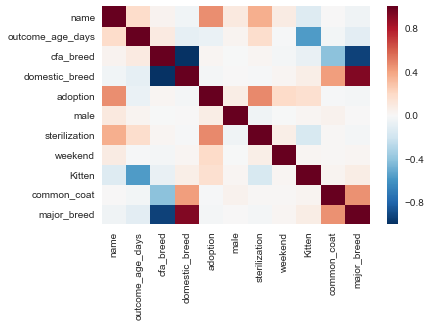

In [62]:
# Anything that is highly correlated and can be dropped ?
sns.heatmap(df_clus.corr())

In [28]:
# Since domestic and cfa breed they are highly correlated, drop domestic breed:
df_clus.drop('domestic_breed', axis=1, inplace=True)

In [59]:
df_clus.drop('outcome_age_days', axis=1, inplace=True)

In [61]:
df_clus.drop('major_breed', axis=1, inplace=True)

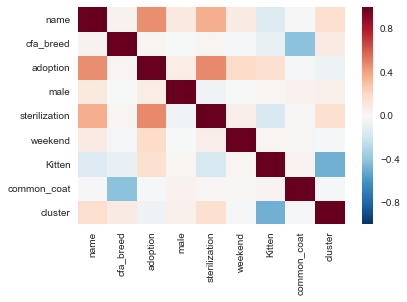

In [62]:
# Correlation seems quite normal now 
sns.heatmap(df_clus.corr())

In [63]:
# clusters = 3
clu = KMeans(n_clusters=3, random_state=0)

In [64]:
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [65]:
clu.fit(df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [66]:
clu.labels_

array([1, 0, 0, ..., 0, 1, 0])

In [67]:
df_clus['cluster']=clu.labels_

In [68]:
df_clus.groupby('cluster').mean()

,name,cfa_breed,adoption,male,sterilization,weekend,Kitten,common_coat
cluster,,,,,,,,
0,0.843841,0.057577,0.826158,0.560567,0.947548,0.385785,0.701777,0.884931
1,0.160608,0.048881,0.004592,0.434953,0.313373,0.263727,0.698680,0.885690
2,0.801211,0.115639,0.373073,0.576542,0.899780,0.319108,0.000000,0.861233


In [69]:
df_clus.groupby('cluster').size()

cluster
0    11706
1    10454
2     3632
dtype: int64

In [71]:
#Check correlation again
df_clus.corr()

,name,outcome_age_days,cfa_breed,adoption,male,sterilization,weekend,Kitten,common_coat,major_breed,cluster
name,1.000000,0.185536,0.036784,0.466001,0.099138,0.363036,0.080176,-0.128111,0.002066,-0.046352,0.168971
outcome_age_days,0.185536,1.000000,0.092309,-0.067064,0.026763,0.174358,-0.008683,-0.568418,-0.028792,-0.101591,0.660978
cfa_breed,0.036784,0.092309,1.000000,0.020065,-0.004047,0.016408,-0.019404,-0.072037,-0.413501,-0.935725,0.078943
adoption,0.466001,-0.067064,0.020065,1.000000,0.076500,0.477359,0.188965,0.157730,-0.009023,-0.022607,-0.053737
male,0.099138,0.026763,-0.004047,0.076500,1.000000,-0.046192,-0.001879,0.021513,0.045968,0.002767,0.053313
sterilization,0.363036,0.174358,0.016408,0.477359,-0.046192,1.000000,0.064591,-0.161727,0.008471,-0.018434,0.163200
weekend,0.080176,-0.008683,-0.019404,0.188965,-0.001879,0.064591,1.000000,0.023043,0.009939,0.019063,-0.009532
Kitten,-0.128111,-0.568418,-0.072037,0.157730,0.021513,-0.161727,0.023043,1.000000,0.026448,0.077771,-0.480573
common_coat,0.002066,-0.028792,-0.413501,-0.009023,0.045968,0.008471,0.009939,0.026448,1.000000,0.453236,-0.022941
major_breed,-0.046352,-0.101591,-0.935725,-0.022607,0.002767,-0.018434,0.019063,0.077771,0.453236,1.000000,-0.089480


In [72]:
#Finding the best clustering method
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,10):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(df_clus)
        sil = metrics.silhouette_score(df_clus, res.labels_)
        print (str(cl)[:10] + ' with k=' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:8] + '     with k=' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

#Seems like cluster with k=2 by Agglomerat has the highest silhouette score 0.8546, which is a quite nice score.
#But we decided to go with 4 groups by kmeans since it also has a quite nice score and may bring more insights compared with only 2 groups.

KMeans(alg with k=2: 0.8516
Birch(bran with k=2: 0.8361
Agglomerat with k=2: 0.8546
KMeans(alg with k=3: 0.7939
Birch(bran with k=3: 0.7386
Agglomerat with k=3: 0.7805
KMeans(alg with k=4: 0.7829
Birch(bran with k=4: 0.7789
Agglomerat with k=4: 0.7851
KMeans(alg with k=5: 0.778
Birch(bran with k=5: 0.7777
Agglomerat with k=5: 0.7713
KMeans(alg with k=6: 0.7803
Birch(bran with k=6: 0.7777
Agglomerat with k=6: 0.7764
KMeans(alg with k=7: 0.7694
Birch(bran with k=7: 0.7772
Agglomerat with k=7: 0.7708
KMeans(alg with k=8: 0.7747
Birch(bran with k=8: 0.7857
Agglomerat with k=8: 0.7727
KMeans(alg with k=9: 0.8027
Birch(bran with k=9: 0.7887
Agglomerat with k=9: 0.8071
***********************************************
Best algorithm is... Agglomer     with k=2
**********************
With Silhouette Score 0.854582706577


In [70]:
# Create a new copy for 4 clusters analysis
df_clus2 = df_clus.copy()

In [71]:
# clusters = 4
clu = KMeans(n_clusters=4, random_state=0)

In [72]:
clu.fit(df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [73]:
clu.labels_

array([3, 1, 1, ..., 1, 3, 1])

In [74]:
df_clus2['cluster']=clu.labels_

In [75]:
df_clus2.groupby('cluster').mean()

,name,cfa_breed,adoption,male,sterilization,weekend,Kitten,common_coat
cluster,,,,,,,,
0,0.858407,0.117109,0.399705,0.574631,0.964012,0.321239,0.000000,0.860767
1,0.843841,0.057577,0.826158,0.560567,0.947548,0.385785,0.701777,0.884931
2,0.131601,0.052640,0.003998,0.000000,0.450941,0.273696,0.674496,0.873397
3,0.189431,0.046452,0.005114,1.000000,0.121244,0.252291,0.693586,0.900490


In [76]:
df_clus2.groupby('cluster').size()

cluster
0     3390
1    11706
2     6003
3     4693
dtype: int64

Clustering conclusions: 
We can see that kmeans clustering divided shelter cats into 4 groups mainly by the differences in their ages.
Cluster 0 is consisted of 3 years old cats which has the lowest adoption rate.
On the other hand, cluster 1 is the "kitten cluster" which has the highest 46% adoption rate.
The other two groups all belong to the "old cat" group. Compared with cluster 2, cluster 3 has a slightly higher male cats percentages which brings a higher adoption rate.
Lastly, both cluser 2 and 3 have a higher percentages in names and famous cats. But those features still cannot change the impact of age in terms of the chance of adoption.

# <u> 5. Regression <u>

The only continuous variable in this dataset is outcome_age_days. We tried to use it as the Y variable for Lasso regression or Decision Tree regressor, but the result is hard to interpret and does not make any sense to us. We cannot say that a cat elder/younger than another because of the color of its coat or its breed. So we use logistic regression to analyze and predict the cat adoption rate instead.

## Logistic Regression

In [37]:
import statsmodels.api as sm

There are too many types of breeds and coat colorsInstead of making coat a factor variable, we decided to use the column "common_coat" and "major_breed" we created earlier.

In [38]:
df_lr = df.copy()

In [39]:
df_lr.drop('animal_id', axis=1, inplace=True)
df_lr.drop('color', axis=1, inplace=True)
df_lr.drop('outcome_type', axis=1, inplace=True)
df_lr.drop('sex_upon_outcome', axis=1, inplace=True)
df_lr.drop('Spay/Neuter', axis=1, inplace=True)
df_lr.drop('age_range', axis=1, inplace=True)
df_lr.drop('outcome_month', axis=1, inplace=True)
df_lr.drop('outcome_year', axis=1, inplace=True)
df_lr.drop('outcome_hour', axis=1, inplace=True)
df_lr.drop('sex', axis=1, inplace=True)
df_lr.drop('sex_age_outcome', axis=1, inplace=True)
df_lr.drop('domestic_breed',axis=1, inplace=True)

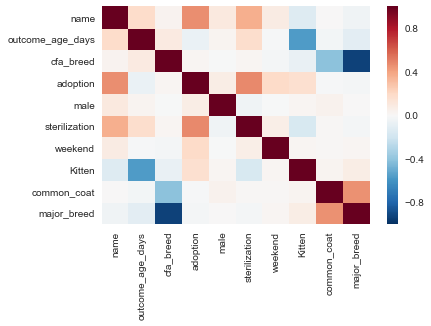

In [82]:
sns.heatmap(df_lr.corr())

In [40]:
# There are too many types of coats. Instead of making coat color a factor variable, we use "common_coat" instead.
df_lr.drop('coat', axis = 1, inplace = True)

# There are too many types of breeds, and the major_breed is highly correlated with cfa_breed because most cfa breeds are rare
# species which are not that common. 
# So we dropped both the "breed" and the "major_breed" and only use "cfa_breed" as the variable to indicate breeds. 
df_lr.drop('breed', axis=1, inplace=True)
df_lr.drop('major_breed', axis=1, inplace=True)
df_lr.drop('outcome_age_days', axis=1, inplace=True)

In [41]:
# There are too many unknown in coat_pattern, so we decided not to use it.
df.coat_pattern.value_counts().head()
df_lr.drop('coat_pattern', axis=1, inplace=True)

tabby      13613
unknown    10264
point       1297
torbie       190
smoke        155
Name: coat_pattern, dtype: int64

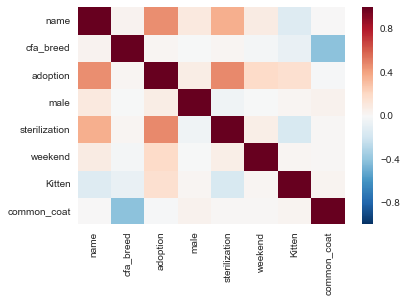

In [42]:
# Check correlation again
sns.heatmap(df_lr.corr())

In [43]:
df_lr['intercept'] = 1.0

In [44]:
X = df_lr.drop('adoption', axis=1)
Y = df_lr.adoption

In [45]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25792 entries, 0 to 29420
Data columns (total 9 columns):
name             25792 non-null int32
cfa_breed        25792 non-null int32
adoption         25792 non-null int32
male             25792 non-null int32
sterilization    25792 non-null int32
weekend          25792 non-null int64
Kitten           25792 non-null int32
common_coat      25792 non-null int32
intercept        25792 non-null float64
dtypes: float64(1), int32(7), int64(1)
memory usage: 1.3 MB


In [46]:
logit = sm.Logit(Y, X)

In [47]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.411034
         Iterations 7


In [48]:
# Print the result of the logistic regression. All the variables included are significant. 
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               adoption   No. Observations:                25792
Model:                          Logit   Df Residuals:                    25784
Method:                           MLE   Df Model:                            7
Date:                Sun, 01 Apr 2018   Pseudo R-squ.:                  0.3983
Time:                        23:25:08   Log-Likelihood:                -10601.
converged:                       True   LL-Null:                       -17619.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
name              2.4255      0.043     56.715      0.000       2.342       2.509
cfa_breed         0.2316      0.073      3.172      0.002       0.089       0.375
male              0.3431      0.035     

In [49]:
coefficient = (np.exp(result.params) - 1) * 100

In [50]:
print coefficient

name             1030.829346
cfa_breed          26.065934
male               40.929222
sterilization    2578.397455
weekend           148.962474
Kitten            751.643187
common_coat       -19.447038
intercept         -99.728436
dtype: float64


Interpretation:

1. If a cat has a name, the probability of adoption increases by around 655% holding other variables constant. 
2. If a cat's age increase by one day, the probability of adoption decreases by around 0.06% holding other variables constant. 
3. If a cat has cfa certificate (rare species), the probability of adoption increases by around 24% holding other variables constant. 
4. If a cat is spayed or neuter, the probability of adoption increases by around 1497% holding other variables constant. 
5. If a cat is a male, the probability of adoption increase by around 44% holding other variables constant.
6. If a cat has a common coat color, the probability of adoption decreases by around 18% holding other variables constant. 
7. The probability of adoption is much higher if it is in weekend. 

The adoption rate is mainly influenced by name, sterilization and kitten.

### Prediction

In [94]:
age_days = np.linspace(df_lr['outcome_age_days'].min(), df_lr['outcome_age_days'].max(), 50)
print age_days

[    0.           163.87755102   327.75510204   491.63265306   655.51020408
   819.3877551    983.26530612  1147.14285714  1311.02040816  1474.89795918
  1638.7755102   1802.65306122  1966.53061224  2130.40816327  2294.28571429
  2458.16326531  2622.04081633  2785.91836735  2949.79591837  3113.67346939
  3277.55102041  3441.42857143  3605.30612245  3769.18367347  3933.06122449
  4096.93877551  4260.81632653  4424.69387755  4588.57142857  4752.44897959
  4916.32653061  5080.20408163  5244.08163265  5407.95918367  5571.83673469
  5735.71428571  5899.59183673  6063.46938776  6227.34693878  6391.2244898
  6555.10204082  6718.97959184  6882.85714286  7046.73469388  7210.6122449
  7374.48979592  7538.36734694  7702.24489796  7866.12244898  8030.        ]


In [95]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [125]:
combos = pd.DataFrame(cartesian([age_days, [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1.]]))

In [126]:
combos.columns = ['outcome_age_days', 'name', 'cfa_breed', 'male', 'sterilization', 
                  'weekend', 'common_coat', 'intercept']

In [127]:
X = df_lr.drop('adoption', axis=1)

In [99]:
combos['adop_pred'] = result.predict(combos[X.columns])

In [100]:
print combos.tail()

      outcome_age_days  name  cfa_breed  male  sterilization  weekend  \
3195            8030.0   0.0        0.0   0.0            1.0      0.0   
3196            8030.0   0.0        0.0   0.0            0.0      1.0   
3197            8030.0   0.0        0.0   0.0            0.0      1.0   
3198            8030.0   0.0        0.0   0.0            0.0      0.0   
3199            8030.0   0.0        0.0   0.0            0.0      0.0   

      common_coat  intercept  adop_pred  
3195          0.0        1.0   0.002592  
3196          1.0        1.0   0.000337  
3197          0.0        1.0   0.000409  
3198          1.0        1.0   0.000134  
3199          0.0        1.0   0.000163  


In [101]:
import pylab as pl

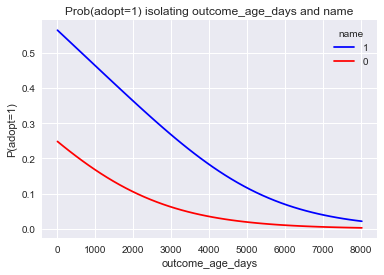

In [102]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['adop_pred'], index=[variable, 'name'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.name.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['adop_pred'],
                color=colors[int(col)])
 
    pl.xlabel(variable)
    pl.ylabel("P(adopt=1)")
    pl.legend(['1', '0'], loc='upper right', title='name')
    pl.title("Prob(adopt=1) isolating " + variable + " and name")
    pl.show()
 
isolate_and_plot('outcome_age_days')

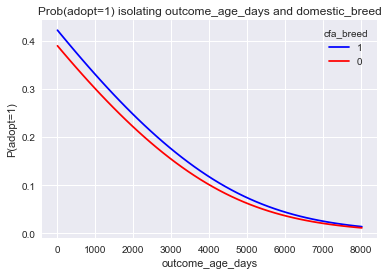

In [103]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['adop_pred'], index=[variable, 'cfa_breed'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.name.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['adop_pred'],
                color=colors[int(col)])
 
    pl.xlabel(variable)
    pl.ylabel("P(adopt=1)")
    pl.legend(['1', '0'], loc='upper right', title='cfa_breed')
    pl.title("Prob(adopt=1) isolating " + variable + " and domestic_breed")
    pl.show()
 
isolate_and_plot('outcome_age_days')

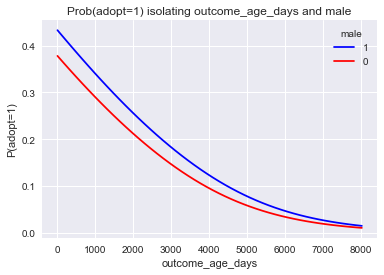

In [104]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['adop_pred'], index=[variable, 'male'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.name.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['adop_pred'],
                color=colors[int(col)])
 
    pl.xlabel(variable)
    pl.ylabel("P(adopt=1)")
    pl.legend(['1', '0'], loc='upper right', title='male')
    pl.title("Prob(adopt=1) isolating " + variable + " and male")
    pl.show()
 
isolate_and_plot('outcome_age_days')

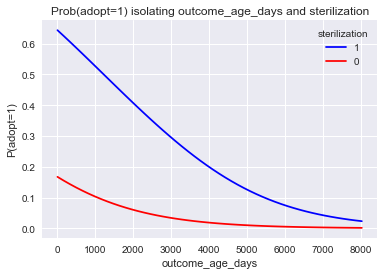

In [105]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['adop_pred'], index=[variable, 'sterilization'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.name.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['adop_pred'],
                color=colors[int(col)])
 
    pl.xlabel(variable)
    pl.ylabel("P(adopt=1)")
    pl.legend(['1', '0'], loc='upper right', title='sterilization')
    pl.title("Prob(adopt=1) isolating " + variable + " and sterilization")
    pl.show()
 
isolate_and_plot('outcome_age_days')

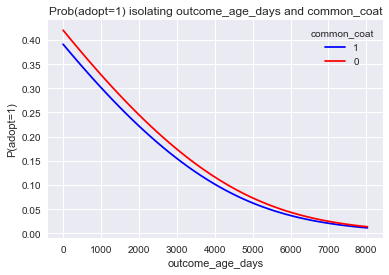

In [106]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['adop_pred'], index=[variable, 'common_coat'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.name.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['adop_pred'],
                color=colors[int(col)])
 
    pl.xlabel(variable)
    pl.ylabel("P(adopt=1)")
    pl.legend(['1', '0'], loc='upper right', title='common_coat')
    pl.title("Prob(adopt=1) isolating " + variable + " and common_coat")
    pl.show()
 
isolate_and_plot('outcome_age_days')

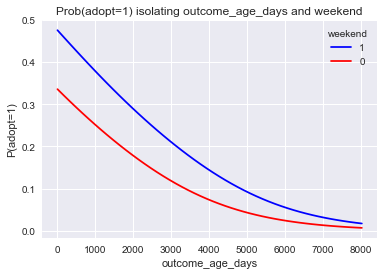

In [107]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['adop_pred'], index=[variable, 'weekend'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.name.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['adop_pred'],
                color=colors[int(col)])
 
    pl.xlabel(variable)
    pl.ylabel("P(adopt=1)")
    pl.legend(['1', '0'], loc='upper right', title='weekend')
    pl.title("Prob(adopt=1) isolating " + variable + " and weekend")
    pl.show()
 
isolate_and_plot('outcome_age_days')

Explaination:

When the cat is young, having a name or being spayed or neuter does have a huge influence on increasing the adoption probability, while sex, coat color and breed do not have that much influence. When the cat is getting older, the differences become smaller and smaller. Generally speaking, cat has a higher probability to be adopted in weekend and in younger age. 

# Q: How can we increase adoption rate?

# <u> 6.Data Visualization<u>

<b>First, let's see three of the main key factors and how's their impact on adoption rate:

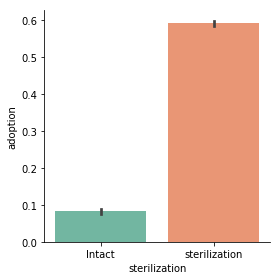

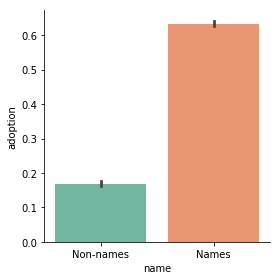

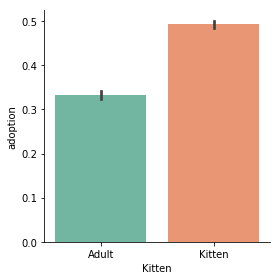

In [26]:
#sterilization
sns.factorplot(x='sterilization',y='adoption',data=df, kind='bar',palette='Set2').set_xticklabels(["Intact", "sterilization"])
#name
sns.factorplot(x='name',y='adoption',data=df, kind='bar', palette='Set2').set_xticklabels(["Non-names", "Names"])
#kitten
sns.factorplot(x='Kitten',y='adoption',data=df, kind='bar',palette='Set2').set_xticklabels(["Adult", "Kitten"])

In [27]:
#sterilization
df_s = df[df['sterilization']==1]
float(len(df_s)) / len(df) *100

#name
df_name = df[df['name']==1]
float(len(df_name)) / len(df) *100

#kitten
df_kitten = df[df['Kitten']==1]
float(len(df_kitten)) / len(df) *100

68.37779156327544

56.09103598014889

60.169820099255574

In [28]:
# What's the adoption rate and how many cats have been adopted under each combination of three key factors.
df.groupby(['sterilization','name','Kitten'])['adoption'].agg(['mean','size'])

mean  size
sterilization name Kitten                
0             0    0       0.002743  1823
                   1       0.011227  3919
              1    0       0.075630   476
                   1       0.300826  1938
1             0    0       0.102387  1885
                   1       0.451055  3698
              1    0       0.524060  6089
                   1       0.897720  5964

<b>Second, how sterilization affects the adoption rate of both male cats and female cats?

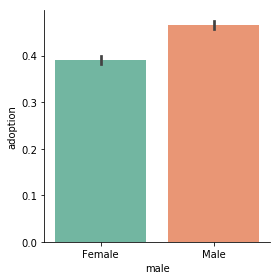

In [29]:
# What's the adoption rate for male and female cats in general.
sns.factorplot(x='male',y='adoption',data=df, kind='bar',palette='Set2').set_xticklabels(["Female", "Male"])

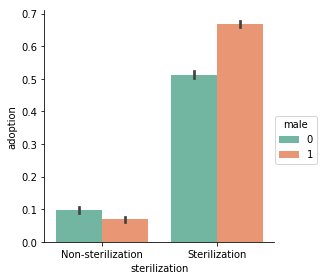

In [30]:
# How adoption rate is affected by sterilization?
sns.factorplot(x='sterilization',y='adoption', hue='male', data=df, kind='bar',palette='Set2').set_xticklabels(["Non-sterilization", "Sterilization"])

In [31]:
# What's the adoption rate and how many cats have been adopted if spay or neuter cats.
df.groupby(['sterilization','male'])['adoption'].agg(['mean','size'])

mean  size
sterilization male                
0             0     0.097462  3704
              1     0.068958  4452
1             0     0.512774  8885
              1     0.668495  8751

<b>Third, how about giving cats a name?

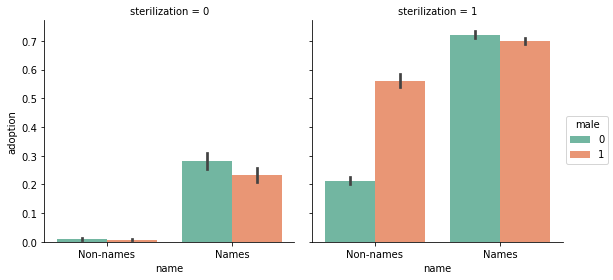

In [32]:
# How adoption rate is affected by giving cats a name?
sns.factorplot(x='name',y='adoption', hue='male', col = 'sterilization', data=df, kind='bar',palette='Set2').set_xticklabels(["Non-names", "Names"])

In [33]:
# What's the adoption rate and how many cats have been adopted if give cats a name or not.
df.groupby(['sterilization','male','name'])['adoption'].agg(['mean','size'])

mean  size
sterilization male name                
0             0    0     0.009972  2507
                   1     0.280702  1197
              1    0     0.007419  3235
                   1     0.232539  1217
1             0    0     0.212859  3655
                   1     0.722371  5230
              1    0     0.561722  1928
                   1     0.698666  6823

How much adoption rate can be increased by giving spayed female cat a name?

In [34]:
0.722371-0.212859

0.509512

How much adoption rate can be increased by giving neuter male cat a name?

In [35]:
0.698666-0.561722

0.13694399999999995

<b>How age affects adoption rate?

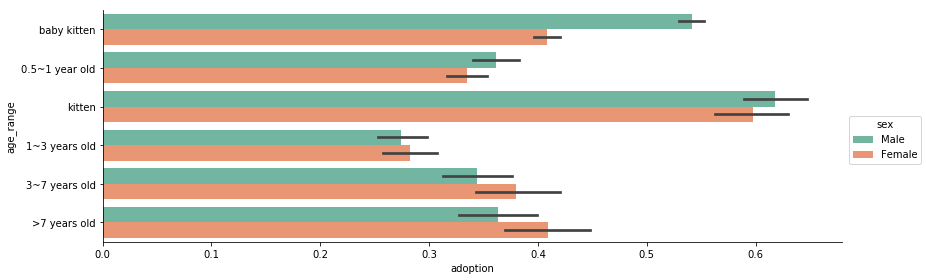

In [36]:
# How adoption rate is affected by age?
sns.factorplot(x='adoption', y='age_range',hue='sex', data=df, kind='bar',palette='Set2',aspect=3)

Based on the above graphs, when cat is getting older, the adoption rate is lower. The name, sterilization and weekend have huge influence on the adoption rate when a cat is young. But as the age increases, the differences are not that obvious.

In [37]:
# What's the adoption rate and how many cats have been adopted for different age ranges.
df.groupby(['male','age_range'])['adoption'].agg(['mean','size'])

mean  size
male age_range                     
0    0.5~1 year old  0.334783  2530
     1~3 years old   0.282843  1393
     3~7 years old   0.380259   618
     >7 years old    0.408867   609
     baby kitten     0.408274  6623
     kitten          0.598039   816
1    0.5~1 year old  0.361471  1931
     1~3 years old   0.274348  1571
     3~7 years old   0.343818   922
     >7 years old    0.363376   699
     baby kitten     0.541850  7037
     kitten          0.617450  1043

<b>Last but not least, how species and look affect adoption rate?

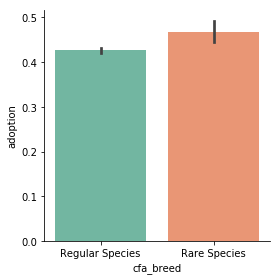

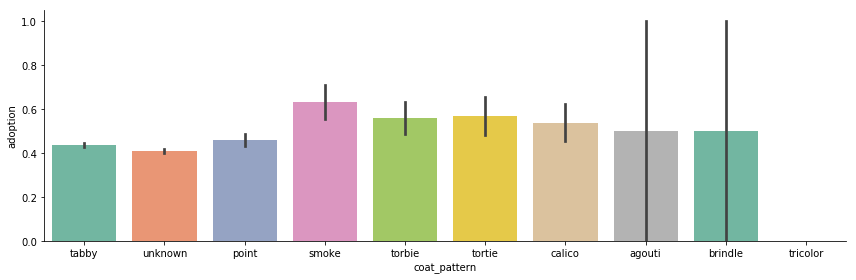

In [38]:
sns.factorplot(x='cfa_breed',y='adoption',data=df, kind='bar',palette='Set2').set_xticklabels(["Regular Species", "Rare Species"])
sns.factorplot(x='coat_pattern',y='adoption',data=df, kind='bar',palette='Set2',aspect=3)

In [39]:
df.groupby(['cfa_breed'])['adoption'].agg(['mean','size'])

,mean,size
cfa_breed,,
0,0.426800,24187
1,0.467913,1605


The adoption rate of regular species is 42.68%.
The adoption rate of rare species is 46.79%

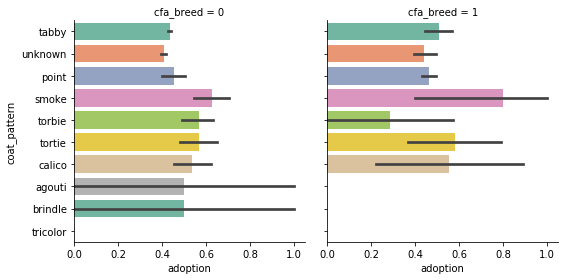

In [40]:
sns.factorplot(x='adoption', y='coat_pattern',col='cfa_breed', data=df, kind='bar',palette='Set2')

In [41]:
# What's the adoption rate and how many cats have been adopted for different age ranges.
df.groupby(['cfa_breed','coat_pattern'])['adoption'].agg(['mean','size'])

mean   size
cfa_breed coat_pattern                 
0         agouti        0.500000      2
          brindle       0.500000      4
          calico        0.537815    119
          point         0.452599    327
          smoke         0.626667    150
          tabby         0.434415  13349
          torbie        0.568306    183
          tortie        0.567797    118
          tricolor      0.000000      2
          unknown       0.407128   9933
1         calico        0.555556      9
          point         0.462887    970
          smoke         0.800000      5
          tabby         0.507576    264
          torbie        0.285714      7
          tortie        0.578947     19
          unknown       0.441088    331

### 1. The most common coat pattern of adopted cat is tabby.Picture↓↓↓ (A-ha, that makes sense)

(0.0, 1.0, 0.0, 1.0)

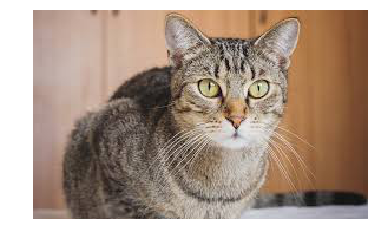

In [42]:
# What tabby cat looks like?
from pylab import imread,subplot,imshow,show
import matplotlib.pyplot as plt
tabby = imread('tabby.jpg') 
axis('off')
plt.imshow(tabby)

### 2. The most popular coat pattern of adopted cats is smoke. Picture↓↓↓ (Well, that's funny...cuz it does not seem to be very adorable;)

(0.0, 1.0, 0.0, 1.0)

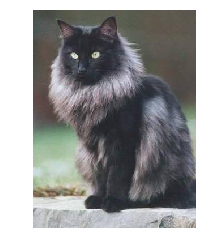

In [43]:
# What smoke cat looks like?
smoke = imread('smoke.jpg') 
axis('off')
plt.imshow(smoke)

### 3. Most adopted rare cats are point cats. Picture↓↓↓ (that is also quite reasonable)

(0.0, 1.0, 0.0, 1.0)

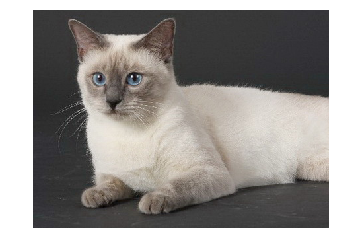

In [44]:
# What point cat looks like?
point = imread('point.jpg') 
axis('off')
plt.imshow(point)

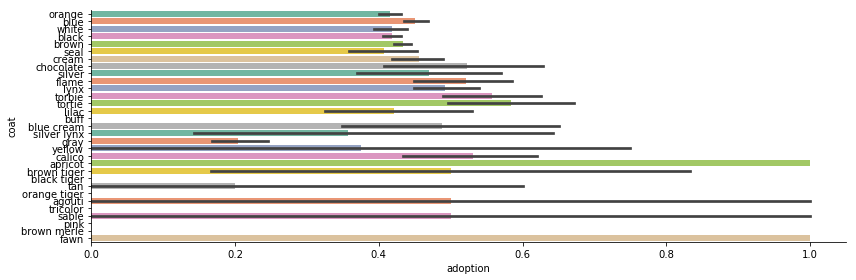

In [45]:
sns.factorplot(x='adoption',y='coat',data=df, kind='bar',palette='Set2',aspect=3)

In [46]:
df.groupby(['coat'])['adoption'].agg(['mean','size'])

,mean,size
coat,,
agouti,0.500000,2
apricot,1.000000,1
black,0.418624,7109
black tiger,0.000000,1
blue,0.450525,3618
blue cream,0.488372,43
brown,0.433522,6897
brown merle,0.000000,2
brown tiger,0.500000,6


Among common coat colors, the adoption rate of blue(45.05%), brown(43.35%) or cream cats(45.65%) are higher than that of black(41.86%), orange(41.57%) or white cats(41.78%).

# <u> 7.Interesting Findings:

<b>Finding 1:</b> Male cat is more popular in general.
Even both female and male cats are spayed or neutered...

<b>Finding 2:</b> But, you can easily change everything —— just give female cat a name!


You can increase 50.95% adoption chance for a female cat just by a name! 
But you can only increase 13.69% chance for male cat by a name.

<b>Finding 3:</b>  You would think that young cats are much more popular than elder cats. But actually, 1~3 year old cat is the least popular group.

<b>Finding 4:</b> Male cats are more popular than female cats in general. However, people in Austin prefer a female cat more if she is older than 5 years old. 

<b>Finding 5:</b> Different from our expectaction, rare species (famous cats) do not have distinct advantages in terms of adoption. Appearence of a cat (coat pattern and coat color) seems to be a more important aspect to adopters. And we also did not expect that smoke color cat is the most popular one...(since apparently it is not the most adorable color haha).

# <u> 8.Conclusions:

<li>Please <b>give every cat in shelter a name</b>! Currently, only 56% of cats in shelter have a name. By giving shelter cats a name can increase adoption rate by 44  percentage point, especially for female cats, the  influence is more than 51 percentage point.</li>
<li>If funding allows, make sure to <b>neuter or spay cats</b> can increase adoption rate by 50%. Currently, only 68.4% of cats in shelter accepted sterilization.</li>
<li>Next time when you visit an animal shelter, please pick those who are <b>female cats without a name, 1~3 years old cats, female kittens, old male cats, domestic-breed cats, black/orange/white cats</b>. They are more in need of help.</li>
<li>Initial marketing campaigns on <b>weekend</b>.</li>
